In [1]:
import torch
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.decomposition import PCA
from patsy import dmatrices

DATA_DIR = '../data'
EMBEDDING_FILE = 'mimic_cfm_new.npy'
META_FILE = 'mimic_meta.csv'

REDUCE_DIM = True
N_COMPONENTS = 111
TARGET_DISEASE = 'Pleural Effusion'

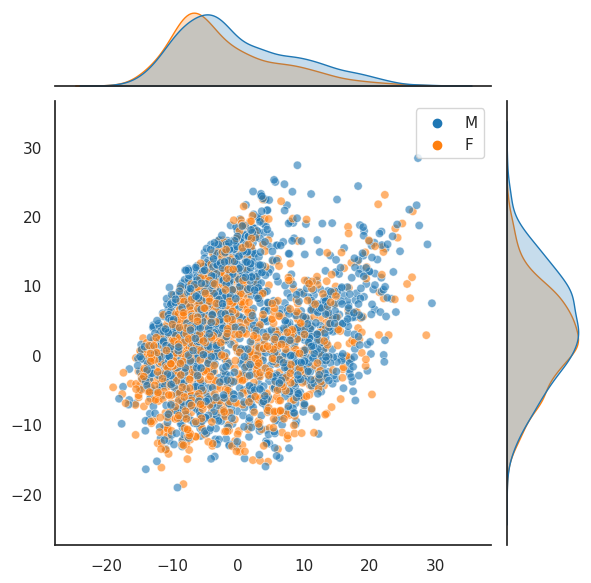

In [7]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_theme(style='white', palette=None)
# fig = sns.jointplot(
#     x=test_emb[:, 0],
#     y=test_emb[:, 1],
#     hue=evaluator.test_df['sex'],
#     kind='scatter',
#     alpha=0.6,
#     hue_order=['M', 'F'],
#     joint_kws=dict(rasterized=True)
# )
# fig.ax_joint.legend(loc='upper right')
# plt.show()

In [24]:
from torch.nn import Conv2d, Identity
from torchvision.models import resnet50

chess_path = '../data/chess.pt'

model = resnet50()
model.conv1 = Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.fc = Identity()
state_dict = torch.load(chess_path, map_location='cpu')

#print(list(checkpoint['state_dict'].keys()))
#state_dict = checkpoint['state_dict']
# for k in list(state_dict.keys()):
#     # retain only encoder_q up to before the embedding layer
#     if k.startswith('module.encoder_q') and not k.startswith('module.encoder_q.fc'):
#         # remove prefix
#         state_dict[k[len("module.encoder_q."):]] = state_dict[k]
#     # delete renamed or unused k
#     del state_dict[k]
#     
model.load_state_dict(state_dict)
#assert set(msg.missing_keys) == {'fc.weight', 'fc.bias'}


#torch.save(model.state_dict(), '../data/chess.pt')

<All keys matched successfully>

In [ ]:
def cutoff(image):
    img = image
    img = cv2.resize(img,(512,512))
    img = np.clip(img, 0, np.percentile(img, 99))
    img -= img.min()
    img /= (img.max() - img.min())

    img = img.astype(np.uint8)
    return img

In [17]:
x = torch.rand(1, 1, 512, 512)
print(model(x).shape)

torch.Size([1, 2048])
